In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
color_pal=sns.color_palette()

In [2]:
df=pd.read_csv('product a.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head()

,Product Name,Product Category,Sales,Market Size,Marketing Expense
Month-Year,,,,,
2019-01-01,Product A,Pain/Analgesic,54555,2738080,177316
2019-02-01,Product A,Pain/Analgesic,54293,4637013,300290
2019-03-01,Product A,Pain/Analgesic,58798,7079920,458491
2019-04-01,Product A,Pain/Analgesic,53229,3744057,242463
2019-05-01,Product A,Pain/Analgesic,50558,4196578,271768


In [4]:
sales_a= df.drop(['Product Name','Product Category'],axis=1)

In [5]:
sales_a

,Sales,Market Size,Marketing Expense
Month-Year,,,
2019-01-01,54555,2738080,177316
2019-02-01,54293,4637013,300290
2019-03-01,58798,7079920,458491
2019-04-01,53229,3744057,242463
2019-05-01,50558,4196578,271768
2019-06-01,56326,6396559,414237
2019-07-01,50125,2545212,164826
2019-08-01,56414,6294066,407600
2019-09-01,55658,5454980,353261


<Axes: title={'center': 'Product A'}, xlabel='Month-Year'>

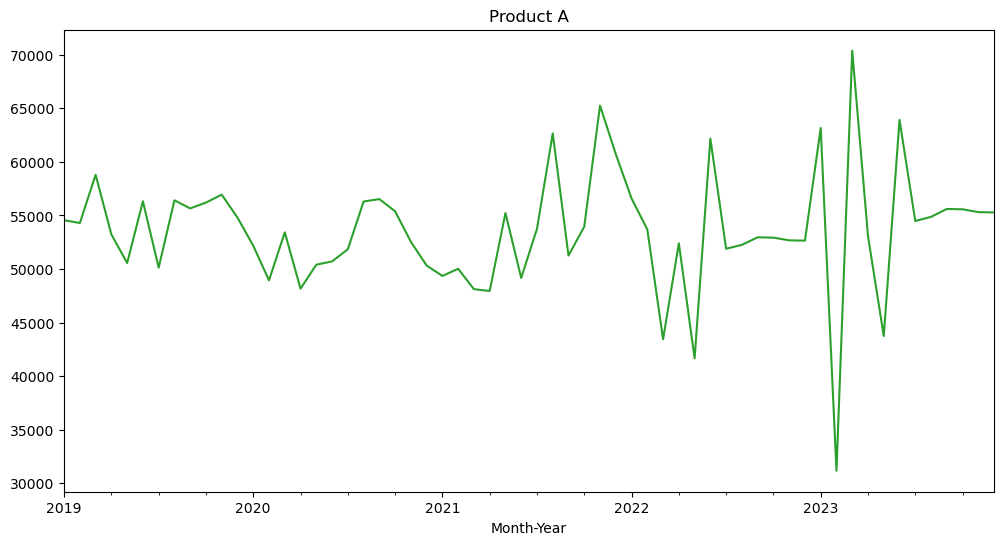

In [6]:
sales_a['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product A')

<Axes: ylabel='Frequency'>

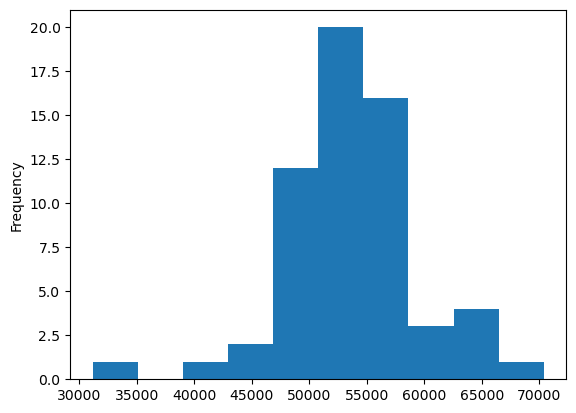

In [7]:
sales_a['Sales'].plot(kind='hist')

# Visualization

In [8]:
sales_b.head()

NameError: name 'sales_b' is not defined

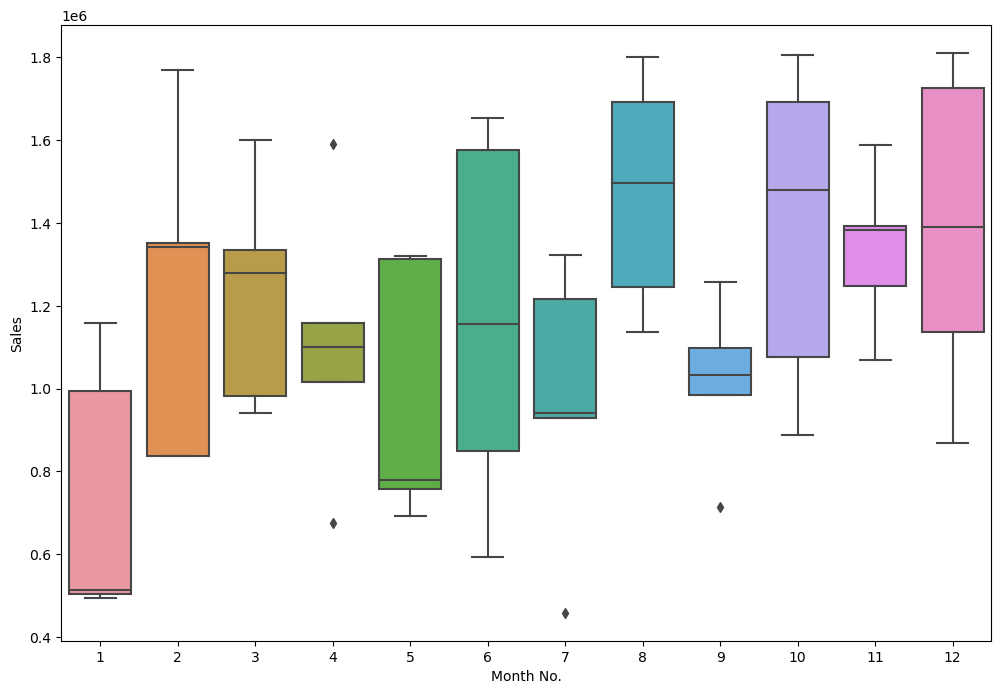

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_b, x='Month No.',y='Sales')
plt.show()

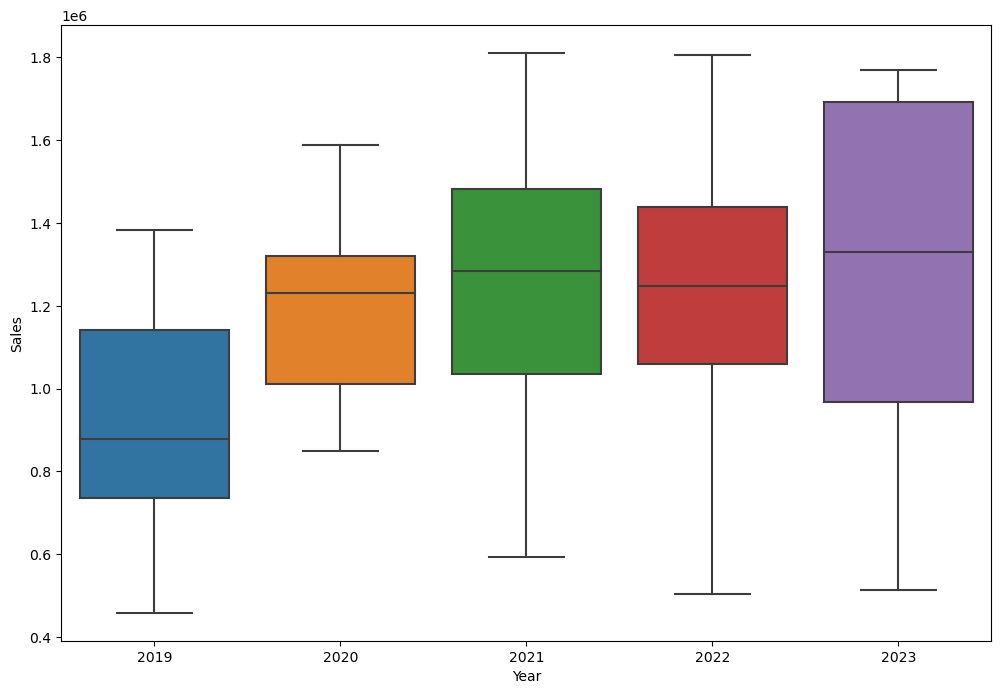

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_b, x='Year',y='Sales')
plt.show()

# Feature Engineering

In [18]:
#sales_b= df.drop(['Product Name','Product Category','Month','Month No.','Year'],axis=1)

In [9]:
sales_a['quarter'] = sales_a.index.quarter
sales_a['month'] = sales_a.index.month
sales_a['year'] = sales_a.index.year

In [10]:
# Create lagged values
lagged_intervals = [6,7,8]  # Lagged intervals in months
for lag in lagged_intervals:
    sales_a[f'sales_lag_{lag}'] = sales_a['Sales'].shift(lag)

In [11]:
print(sales_a)

            Sales  Market Size  Marketing Expense  quarter  month  year  \
Month-Year                                                                
2019-01-01  54555      2738080             177316        1      1  2019   
2019-02-01  54293      4637013             300290        1      2  2019   
2019-03-01  58798      7079920             458491        1      3  2019   
2019-04-01  53229      3744057             242463        2      4  2019   
2019-05-01  50558      4196578             271768        2      5  2019   
2019-06-01  56326      6396559             414237        2      6  2019   
2019-07-01  50125      2545212             164826        3      7  2019   
2019-08-01  56414      6294066             407600        3      8  2019   
2019-09-01  55658      5454980             353261        3      9  2019   
2019-10-01  56203      4923556             318846        4     10  2019   
2019-11-01  56943      7661409             496148        4     11  2019   
2019-12-01  54800      48

# Train/Test Split

In [12]:
train= sales_a[:54]
test=sales_a[54:]

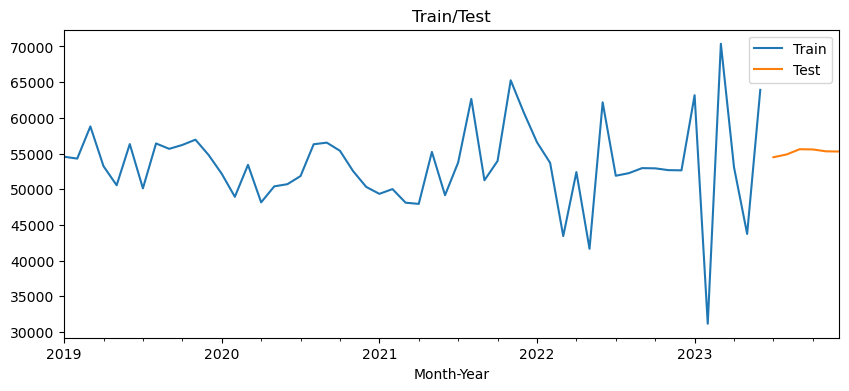

In [13]:
fig,ax=plt.subplots(figsize=(10,4))
train['Sales'].plot(ax=ax,label='Train set',title='Train/Test')
test['Sales'].plot(ax=ax,label='Test set')
plt.legend(['Train','Test'])
plt.show()

In [14]:
test.tail(6)

,Sales,Market Size,Marketing Expense,quarter,month,year,sales_lag_6,sales_lag_7,sales_lag_8
Month-Year,,,,,,,,,
2023-07-01,54485,5339196,426575,3,7,2023,63171.0,52648.0,52677.0
2023-08-01,54869,9714819,776165,3,8,2023,31168.0,63171.0,52648.0
2023-09-01,55607,5938316,474441,3,9,2023,70380.0,31168.0,63171.0
2023-10-01,55575,9714819,776165,4,10,2023,53078.0,70380.0,31168.0
2023-11-01,55311,6133652,490048,4,11,2023,43741.0,53078.0,70380.0
2023-12-01,55281,9910156,791771,4,12,2023,63919.0,43741.0,53078.0


In [15]:
x_train = train.drop(columns=['Sales'])
y_train=train['Sales']
x_test=test.drop(columns=['Sales'])
y_test=test['Sales']

In [16]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000, 2000],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Instantiate the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [17]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=100,
                       objective='reg:squarederror',
                       max_depth=7,
                       colsample_bytree=1.0,
                       subsample= 0.7,
                       early_stopping_rounds=50,
                       learning_rate=0.01)

reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:53214.97881	validation_1-rmse:54669.08938
[99]	validation_0-rmse:20834.38110	validation_1-rmse:23852.65112


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
reg.best_iteration

99

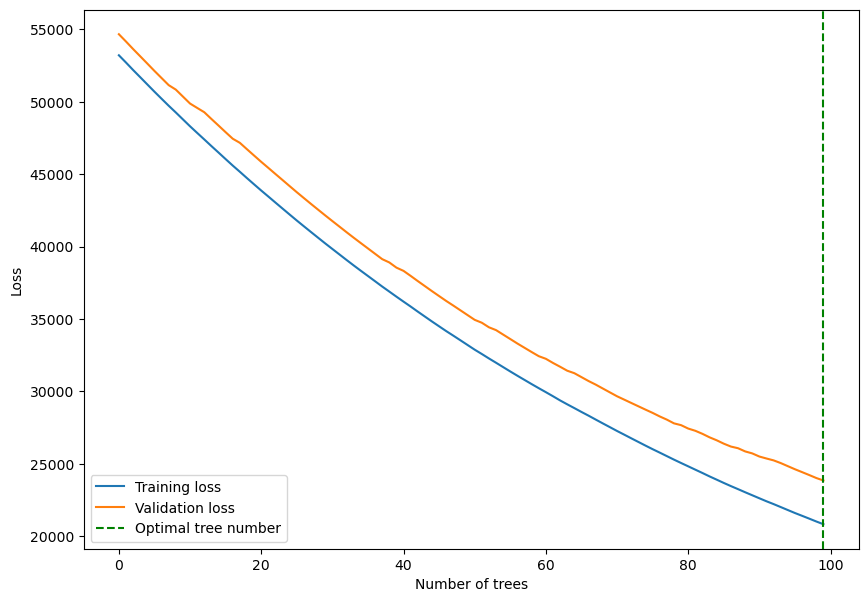

In [19]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(99,color='green',ls='--', label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

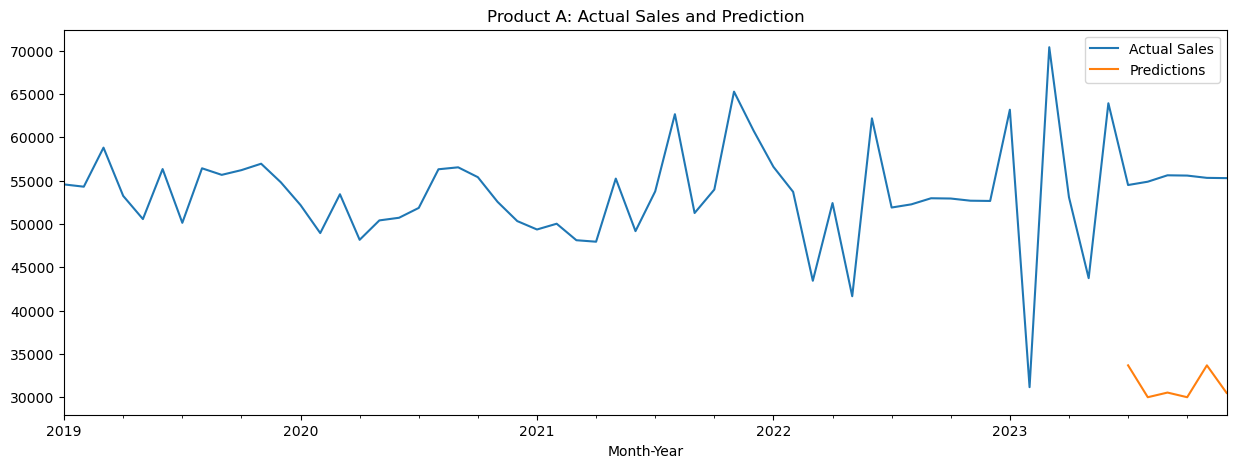

In [21]:
pred=reg.predict(x_test)
sales_a['prediction']=[None]*len(train) + list(pred)

ax = sales_a['Sales'].plot(figsize=(15, 5))
sales_a['prediction'].plot()
plt.legend(['Actual Sales', 'Predictions'])
ax.set_title('Product A: Actual Sales and Prediction')
plt.show()

In [22]:
mae_xgb= mean_absolute_error(test['Sales'],pred)
mse_xgb=mean_squared_error(test['Sales'], pred)
mape_xgb= mean_absolute_percentage_error(test['Sales'],pred)
rmse_xgb= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - XGBoost: {mae_xgb:0.3f}')
print(f'MAPE - XGBoost: {mape_xgb:0.3f}')
print(f'MSE - XGBoost: {mse_xgb:0.3f}')
print(f'RMSE - XGBoost: {rmse_xgb:0.3f}')

MAE - XGBoost: 23780.860
MAPE - XGBoost: 0.431
MSE - XGBoost: 568948970.810
RMSE - XGBoost: 23852.651


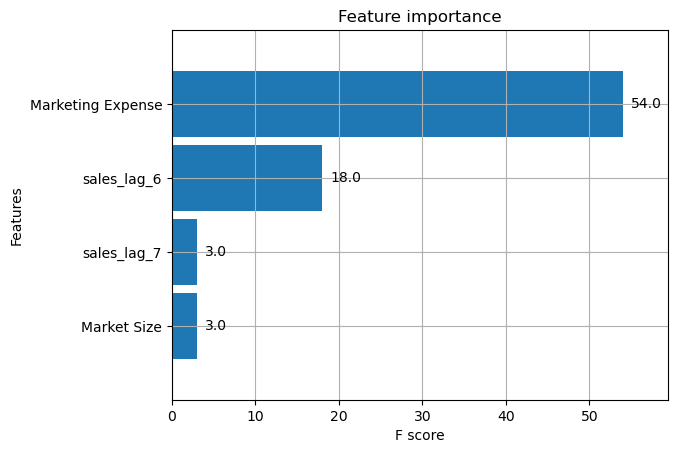

In [23]:
from xgboost import plot_importance

_ = plot_importance(reg, height=0.9)